# Face Detection
## Dlib
기존의 Face Detection으로 사용하던 Dlib 라이브러리를 통해 Face Landmark를 찾아내는 방법은 다음과 같은 문제점을 가지고 있다.
1. 얼굴을 잘 못 찾는다.
2. 동영상을 처리하기엔 너무 느리다.
3. 얼굴각도, 방향, 크기 등의 변화에 취약하다 등

### 문제점
최근 인증수단으로 얼굴인식이 가장 보편적으로 사용되고 있다. 하지만 딥러닝 서버 구동이 필요한 무거운 모델은 핸드폰과 같은 기기의 인증 수단으로는 적합하지 않다.
* 핸드폰에 모델을 올리려면 weight가 작은 모델이 관리에 유리하다.
* 하지만 작은 모델은 성능이 떨어지는 경우가 많으므로 보완이 필요하다.

### 해결 방안
* Face Detection에서 가장 시간이 많이 드는 요소는 Sliding Window이다.
  * 따라서 Sliding Window를 사용하는 2-stage detection은 사용하지 않아야 한다.
* 연산의 병렬화가 가능해야 한다.
  * 컴퓨터는 GPU를 통해 병렬화가 가능하다.
  * 핸드폰의 경우 다음 라이브러리를 통해 병렬화를 사용할 수 있다.
    * 안드로이드 : [MLKit](https://www.slideshare.net/inureyes/ml-kit-machine-learning-sdk)
    * 아이폰 : [CoreML](https://developer.apple.com/documentation/coreml), [TFLite](https://www.tensorflow.org/lite?hl=ko)
  * 또는 병렬화 도구를 사용할 수 있다.
    * [SIMD-병렬-프로그래밍](https://stonzeteam.github.io/SIMD-%EB%B3%91%EB%A0%AC-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/)
    * [OpenCL](https://www.khronos.org/opencl/)
    * [Android: OpenGL ES](https://developer.android.com/guide/topics/graphics/opengl?hl=ko)

## 1. YOLO v1 : You Only Look Once
### (1) RCNN과 YOLO
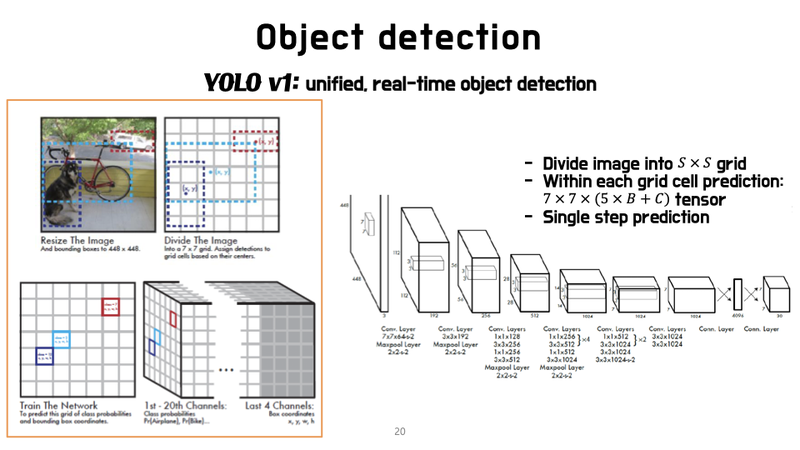
대표적인 2-stage detector인 RCNN과 YOLO 모델은 아래와 같이 기본 가정이 차이난다.
* RCNN 계열의 가정 : "물체가 존재할 것 같은 곳을 backbone network로 표현할 수 있다." → region proposal network
* YOLO v1의 가정 : "이미지 내의 작은 영역을 나누면 그곳에 물체가 있을 수 있다. → grid 내에 물체가 존재한다.
따라서 YOLO v1에서 grid는 고정되고, 각 grid 안에 물체가 있을 확률이 중요하게 된다.

### (2) YOLO의 grid cell
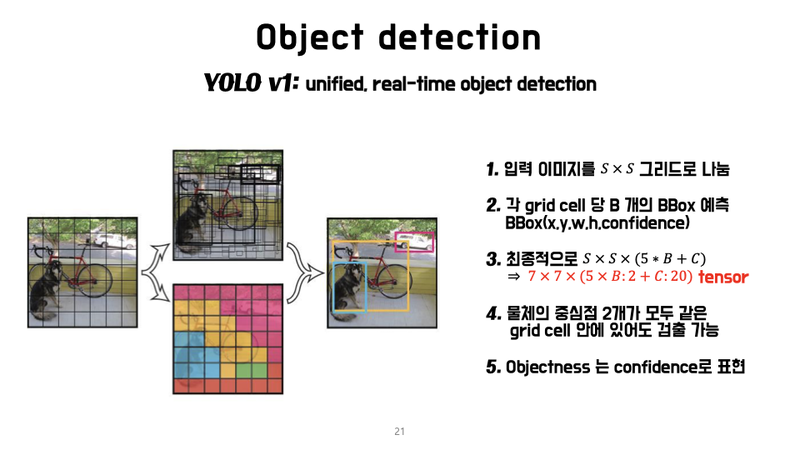
* YOLO는 이미지를 SxS grid로 나누고, 각 grid cell은 bounding box(bbox)와 각 box의 confidence score를 예측한다.
  * confidence score : bbox가 사물을 포함하는지를 모델이 얼마나 확신하는지, 그리고 box가 그 사물을 얼마나 정확히 예측하는지 보여주는 점수
* YOLO의 예측값은 S x S x (B * 5 + C) 크기의 텐서로 출력된다.
* YOLO의 목표는 grid에 포함되는 물체를 잘 잡아내는 것이다.
* 학습 목표가 제대로 이루어졌는지를 확인하려면 객체 인식 모델의 성능 평가 도구인 IoU(Intersection over Union)를 사용한다.

#### NMS(Non-Maximum Suppression)
* 학습이 잘 된 이미지의 경우 Object를 포함한 grid들이 모두 비슷한 크기로 Object의 bbox를 잡는다. → 동일한 물체를 잡는 bbox가 많아진다.
* 비-최대 억제, 위와 같은 문제를 해결하기 위해 object detector가 예측한 bounding box 중 정확한 bounding box를 선택하는 기법

### (3) YOLO의 특징
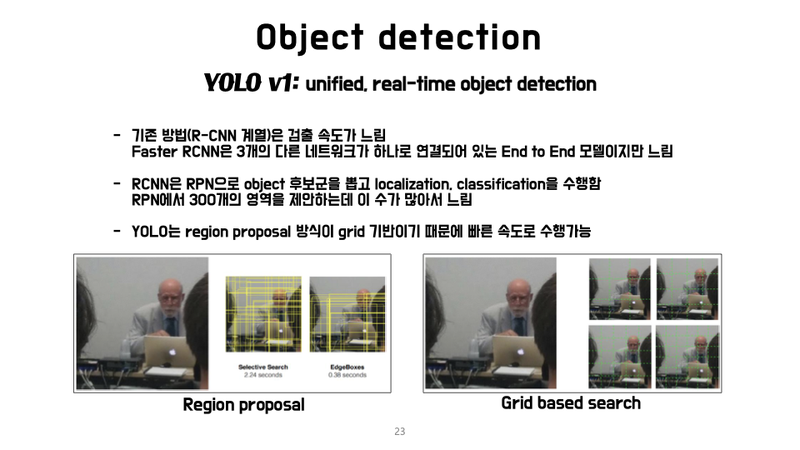

#### R-CNN 계열
* 기존 Object Detection에 사용되던 R-CNN 계열 방법은 검출 속도가 느리다.
* 그 중 빠르다고 여겨지던 Faster R-CNN도 RPN(Region Proposal Network) 후보군을 뽑고 localization과 classification을 수행한다.
* 이 때 RPN에 300개 영역을 제안하는데, objectness의 숫자가 많을수록 느리다.

#### YOLO
* 이미지를 SxS개의 grid로 나누고, 한 개의 grid당 bbox의 좌표와 confidence score만 예측하므로 R-CNN 계열 방법보다 훨씬 빠른 속도를 보여준다.
* 최초의 real-time object detector
v1의 성능
#### YOLO v1의 loss 함수
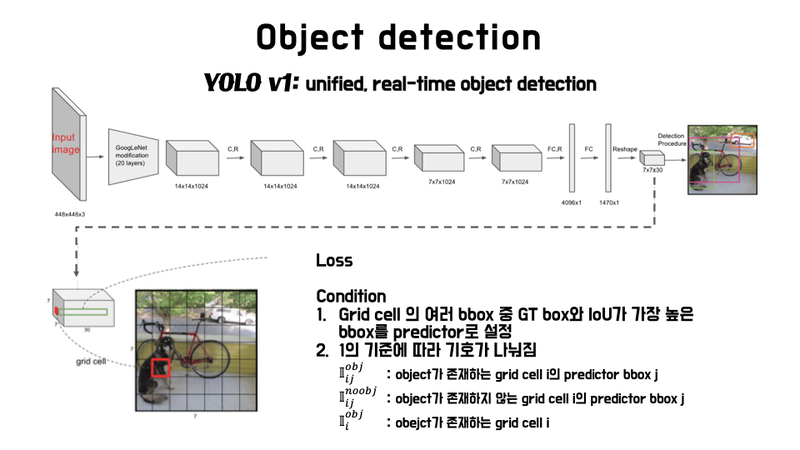
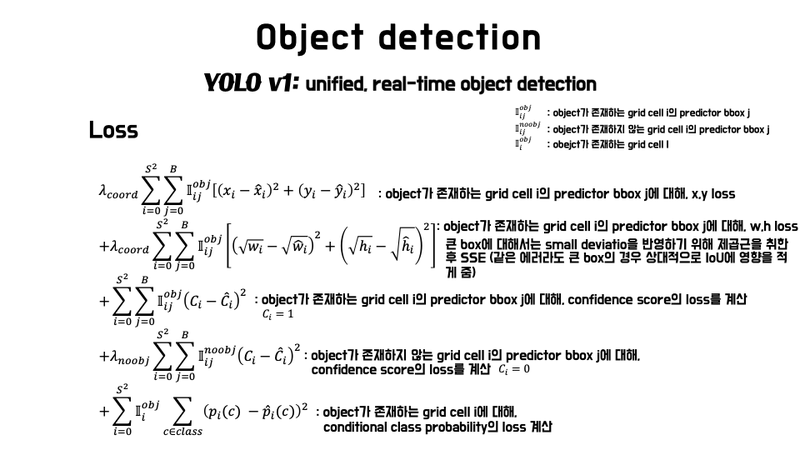
#### YOLO의 성능
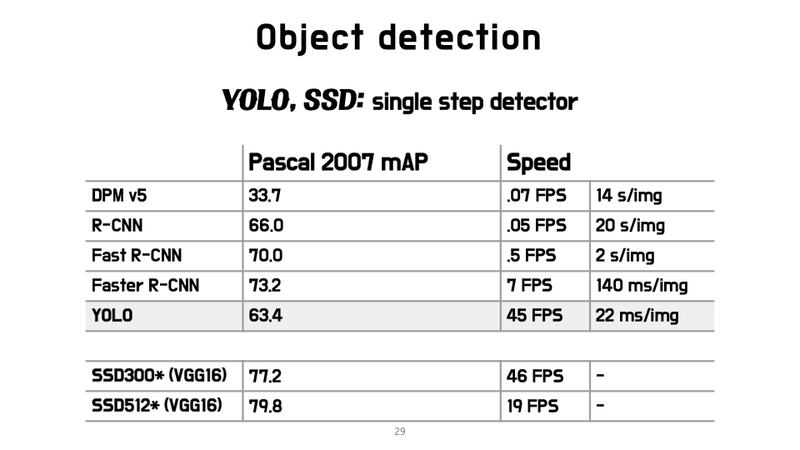
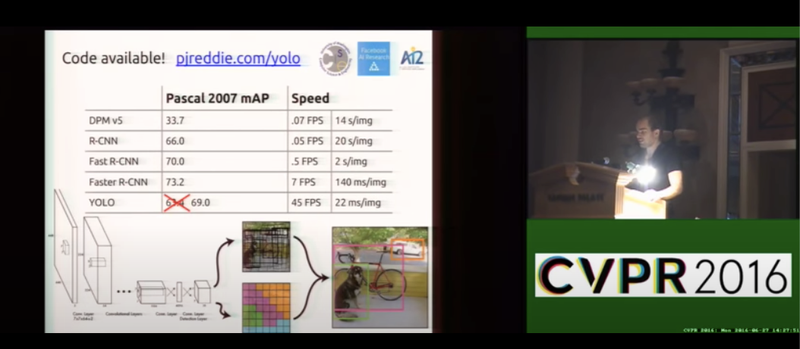
* YOLO v1은 Faster R-CNN과 성능에 큰 차이가 나지 않으면서 속도는 6배 이상 차이가 난다.

#### YOLO v1의 단점
* 각 grid cell이 하나의 클래스만 예측 가능하므로 작은 object에 대해 예측이 어렵다.
* bbox의 형태가 training data를 통해 학습되었기 때문에 bbox 분산이 너무 넓어 새로운 형태의 bbox 예측이 잘 안된다.
* 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부정확하다.

## YOLO v2
* YOLO v1보다 정확도를 더 올리고 속도를 향상시키며 더 많은 범위의 class를 예측하기 위해 발전됨
## YOLO v3
* [관련 논문](https://taeu.github.io/paper/deeplearning-paper-yolov3/)
* YOLO v2 보다 더 발전됨.
## SSD : Single Shot MultiBox Detector
* SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 Image Pyramid, Pre-defined Anchor Box 같은 테크닉을 제안함.
* [관련 논문](https://arxiv.org/pdf/1512.02325.pdf)
### Image Pyramid
* ImageNet으로 사전학습된 VGG16을 사용하며 VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능함.
* SSD는 38x38, 19x19, 10x10, 5x5, 3x3 등의 다양한 크기의 feature map을 사용함.
* 각 feature map은 YOLO의 관점에서 보면 원본 이미지에서 grid 크기를 다르게 하는 효과가 있었으며 5 x 5 크기의 feature map에서 grid가 너무 커서 small object를 못찾는 문제를 38 x 38 크기의 feature map에서 찾을 수 있게 됨.
### SSD의 Workflow
* bounding box가 존재한다면, 그 bounding box만의 x, y, w, h 특성이 존재하기 때문에 pre-defined된 box의 x, y, w, h를 refinement하는 layer를 추가하는 것이 좋으며 anchor box를 SSD에서는 Default box라고 함.
## FCOS
* [관련 논문](https://arxiv.org/pdf/1904.01355.pdf)
* 위의 논문은 기존의 anchor box기반에서 벗어나 pixelwise로 예측하는 FCOS를 제안한 내용임.
* Anchor box를 사용하면서 생기는 부작용을 해결하면서 좋은 성능도 보임.
### Face Detection 관련 논문
* [S3FD](https://seongkyun.github.io/papers/2019/03/21/S3FD/)
* [DSFD](https://arxiv.org/pdf/1810.10220.pdf)
* [RetinaFace](https://arxiv.org/pdf/1905.00641.pdf)
